In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error

from pylab import rcParams
from tqdm import tqdm_notebook
import fbprophet

In [47]:
# df_merged_no_hol_old = pd.read_csv('usage_and_failed_search_no_hol.csv')
df_merged_no_hol = pd.read_csv('no_hol_v2_edited.csv')
df_2018s2 = pd.read_csv('2018_2_no_exam.csv')
df_2019s1 = pd.read_csv('2019_1.csv')
df_closed = pd.read_csv('closed_semester.csv')

# frames = [df_2018s2, df_2019s1]
# joined = pd.concat(frames)
# df = joined[joined['Station_depart.'] == '12 CU Terrace']
# df

Depart Station: 12 CU Terrace

|Destination Station|Best of 2018/2|scale & rounding|2019/1|scale & rounding|Remark
|-------------------|--------------|----------------|------|----------------|------|
|01 Exit to Cham square|93.3%|0.5 and 5|93.3%|0.5 and 5|all 0|
|02 Economics|85.3%|0.5 and 5|
|04 Engineering|74.7%|0.6 and 0.37|59.6%|0.3 and 6|2019/1 0.8 and 9 (upper) give ~50% accuracy but more realistic|


In [49]:
df_o = df_merged_no_hol[df_merged_no_hol['Station_depart.'] == '12 CU Terrace']
df_od = df_o[df_o['Station_dest.'] == '05 Arts']

df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
330,9/1/2019,9:15:33,9:16:00,9:21:48,CP#0R1Y7,12 CU Terrace,05 Arts
555,11/1/2019,9:02:31,9:03:28,9:09:11,CP#0RZ30,12 CU Terrace,05 Arts
661,15/1/2019,11:12:26,11:18:25,11:24:11,CP#0RZ30,12 CU Terrace,05 Arts
1297,25/1/2019,17:46:16,17:46:49,17:53:02,CP#0PHC2,12 CU Terrace,05 Arts
1502,29/1/2019,13:08:51,13:09:42,13:15:29,CP#0R1Y7,12 CU Terrace,05 Arts
1626,30/1/2019,8:52:40,8:53:53,8:59:44,CP#0PHC2,12 CU Terrace,05 Arts
1627,30/1/2019,9:02:19,NaN,NaN,CP#0PHC2,12 CU Terrace,05 Arts
1880,5/2/2019,8:46:43,8:49:00,8:53:45,CP#0PHC2,12 CU Terrace,05 Arts
2151,8/2/2019,8:27:18,8:48:11,8:57:13,CP#0PVP6,12 CU Terrace,05 Arts
2152,8/2/2019,9:48:12,9:49:14,9:56:20,CP#0SZM7,12 CU Terrace,05 Arts


In [50]:
df_od['DateTime'] = df_od[df_od.columns[0:2]].apply(lambda x : '/' .join(x.astype(str)),axis=1)
df_od['DateTime'] = df_od['DateTime'].str.replace(":", "/")

demand = []
demand = [1] * len(df_od)
df_od['Demand'] = demand
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
330,9/1/2019,9:15:33,9:16:00,9:21:48,CP#0R1Y7,12 CU Terrace,05 Arts,9/1/2019/9/15/33,1
555,11/1/2019,9:02:31,9:03:28,9:09:11,CP#0RZ30,12 CU Terrace,05 Arts,11/1/2019/9/02/31,1
661,15/1/2019,11:12:26,11:18:25,11:24:11,CP#0RZ30,12 CU Terrace,05 Arts,15/1/2019/11/12/26,1
1297,25/1/2019,17:46:16,17:46:49,17:53:02,CP#0PHC2,12 CU Terrace,05 Arts,25/1/2019/17/46/16,1
1502,29/1/2019,13:08:51,13:09:42,13:15:29,CP#0R1Y7,12 CU Terrace,05 Arts,29/1/2019/13/08/51,1
1626,30/1/2019,8:52:40,8:53:53,8:59:44,CP#0PHC2,12 CU Terrace,05 Arts,30/1/2019/8/52/40,1
1627,30/1/2019,9:02:19,NaN,NaN,CP#0PHC2,12 CU Terrace,05 Arts,30/1/2019/9/02/19,1
1880,5/2/2019,8:46:43,8:49:00,8:53:45,CP#0PHC2,12 CU Terrace,05 Arts,5/2/2019/8/46/43,1
2151,8/2/2019,8:27:18,8:48:11,8:57:13,CP#0PVP6,12 CU Terrace,05 Arts,8/2/2019/8/27/18,1
2152,8/2/2019,9:48:12,9:49:14,9:56:20,CP#0SZM7,12 CU Terrace,05 Arts,8/2/2019/9/48/12,1


In [51]:
df_od['Date'] = pd.to_datetime(df_od['Date'], dayfirst=True)
df_od.set_index('Date', inplace=True)
# df_train = df_train_clone = df_od[:'2019-04-30']
# df_test = df_test_clone = df_od['2019-05-01':'2019-05-23']
df_train = df_train_clone = df_od[:'2019-03-29']
df_test = df_test_clone = df_od['2019-04-01':'2019-04-30']
df_train2 = df_train_clone2 = df_od['2019-08-13':'2019-09-20']
df_test2 = df_test_clone2 = df_od['2019-09-23':'2019-09-30']
# df_cv = df_cv_clone = df_od[:'2019-05-23']
df_train_clone = df_train_clone.reset_index()
df_test_clone = df_test_clone.reset_index()
df_train_clone2 = df_train_clone2.reset_index()
df_test_clone2 = df_test_clone2.reset_index()
# df_cv_clone = df_cv_clone.reset_index()
df_train_clone

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-09,9:15:33,9:16:00,9:21:48,CP#0R1Y7,12 CU Terrace,05 Arts,9/1/2019/9/15/33,1
1,2019-01-11,9:02:31,9:03:28,9:09:11,CP#0RZ30,12 CU Terrace,05 Arts,11/1/2019/9/02/31,1
2,2019-01-15,11:12:26,11:18:25,11:24:11,CP#0RZ30,12 CU Terrace,05 Arts,15/1/2019/11/12/26,1
3,2019-01-25,17:46:16,17:46:49,17:53:02,CP#0PHC2,12 CU Terrace,05 Arts,25/1/2019/17/46/16,1
4,2019-01-29,13:08:51,13:09:42,13:15:29,CP#0R1Y7,12 CU Terrace,05 Arts,29/1/2019/13/08/51,1
5,2019-01-30,8:52:40,8:53:53,8:59:44,CP#0PHC2,12 CU Terrace,05 Arts,30/1/2019/8/52/40,1
6,2019-01-30,9:02:19,NaN,NaN,CP#0PHC2,12 CU Terrace,05 Arts,30/1/2019/9/02/19,1
7,2019-02-05,8:46:43,8:49:00,8:53:45,CP#0PHC2,12 CU Terrace,05 Arts,5/2/2019/8/46/43,1
8,2019-02-08,8:27:18,8:48:11,8:57:13,CP#0PVP6,12 CU Terrace,05 Arts,8/2/2019/8/27/18,1
9,2019-02-08,9:48:12,9:49:14,9:56:20,CP#0SZM7,12 CU Terrace,05 Arts,8/2/2019/9/48/12,1


In [52]:
print(len(list(dict.fromkeys(df_test_clone['Date']))))

2


In [53]:
start = 7
stop = 21.5
days_forecast = 8
#14*15+45 or 18*15+60 (train = :2019-03-29) or  for 2018/2, 6 for 2019/1
hours_multiplier = 15
prediction_size = days_forecast*hours_multiplier

In [54]:
df_od = df_od.reset_index()
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-09,9:15:33,9:16:00,9:21:48,CP#0R1Y7,12 CU Terrace,05 Arts,9/1/2019/9/15/33,1
1,2019-01-11,9:02:31,9:03:28,9:09:11,CP#0RZ30,12 CU Terrace,05 Arts,11/1/2019/9/02/31,1
2,2019-01-15,11:12:26,11:18:25,11:24:11,CP#0RZ30,12 CU Terrace,05 Arts,15/1/2019/11/12/26,1
3,2019-01-25,17:46:16,17:46:49,17:53:02,CP#0PHC2,12 CU Terrace,05 Arts,25/1/2019/17/46/16,1
4,2019-01-29,13:08:51,13:09:42,13:15:29,CP#0R1Y7,12 CU Terrace,05 Arts,29/1/2019/13/08/51,1
5,2019-01-30,8:52:40,8:53:53,8:59:44,CP#0PHC2,12 CU Terrace,05 Arts,30/1/2019/8/52/40,1
6,2019-01-30,9:02:19,NaN,NaN,CP#0PHC2,12 CU Terrace,05 Arts,30/1/2019/9/02/19,1
7,2019-02-05,8:46:43,8:49:00,8:53:45,CP#0PHC2,12 CU Terrace,05 Arts,5/2/2019/8/46/43,1
8,2019-02-08,8:27:18,8:48:11,8:57:13,CP#0PVP6,12 CU Terrace,05 Arts,8/2/2019/8/27/18,1
9,2019-02-08,9:48:12,9:49:14,9:56:20,CP#0SZM7,12 CU Terrace,05 Arts,8/2/2019/9/48/12,1


In [55]:
def fill_missing(df, df_main, type):
    date = list(dict.fromkeys(df_main['Date']))
    if (type == True):
        oper_time = list(np.arange(start, stop, 0.5))
    else:
        oper_time = list(np.arange(start, stop))
    timestamp_all = []

    for each in date:
        each = str(each)
        each = each[0:11]
        for h in oper_time:
            (y, m, d) = each.split('-')
            d, m, y, hh = int(d), int(m), int(y), int(h)
            if (((h*10)%10) == 5):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
            timestamp_all.append(timestamp)

    timestamp_fill = list(set(timestamp_all) - set((list(dict.fromkeys(df_main['Timestamp'])))))
    
    demand_fill = []
    demand_fill = [0] * len(timestamp_fill)

    data_fill = {'Timestamp': timestamp_fill, 'Demand': demand_fill}    
    df_od_fill = pd.DataFrame(data_fill)
    df_od_fill = df_od_fill.sort_values('Timestamp')
    df_od_fill = df_od_fill.reset_index(drop=True)
    
    df, backup = group_by_time(df)
    
    df = df.append(df_od_fill)
    df = df.sort_values('Timestamp')
    df = df.reset_index(drop=True)
    
    return df

def group_by_time(df):
    df = df.groupby('Timestamp').sum()
    backup = df
    df = df.reset_index()
    
    return df, backup

def create_window(df, type):
    converted_regist = []

    for slot in df['regist_dt_ICT']:
        (h, m, s) = slot.split(':')
        if (type == True):
            if (int(m) >= 30):
                time = int(h) + 0.5
            else:
                time = int(h)
        else:
            time = int(h)
        converted_regist.append(time)    

    df['Converted_Regist'] = converted_regist

    df = df[df['Converted_Regist'] >= start]
    df = df[df['Converted_Regist'] < stop]
    df = df.drop(['Converted_Regist'], axis=1)
    
    return df

def create_timestamp(df, type): 
    timestamp_converted = []
    for slot in df['DateTime']:
        (d, m, y, hh, mm, ss) = slot.split('/')
        d, m, y, hh, mm = int(d), int(m), int(y), int(hh), int(mm)
        if (type == True):
            if (mm >= 30):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        else:
            timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_converted.append(timestamp)
    df['Timestamp'] = timestamp_converted
    
    return df

In [56]:
df_train_clone = create_timestamp(df_train_clone, True)
train_framed = create_window(df_train_clone, True)
train, backup_train = group_by_time(train_framed)
train = train_clone = fill_missing(train, df_train_clone, True)
train

,Timestamp,Demand
0,2019-01-09 07:00:00,0
1,2019-01-09 07:30:00,0
2,2019-01-09 08:00:00,0
3,2019-01-09 08:30:00,0
4,2019-01-09 09:00:00,1
...,...,...
517,2019-03-29 19:00:00,0
518,2019-03-29 19:30:00,0
519,2019-03-29 20:00:00,0
520,2019-03-29 20:30:00,0


In [57]:
df_test_clone = create_timestamp(df_test_clone, False)
test_framed = create_window(df_test_clone, False)
test, backup_test = group_by_time(test_framed)
test = test_clone = fill_missing(test, df_test_clone, False)
test

,Timestamp,Demand
0,2019-04-11 07:00:00,0
1,2019-04-11 08:00:00,0
2,2019-04-11 09:00:00,0
3,2019-04-11 10:00:00,0
4,2019-04-11 11:00:00,0
5,2019-04-11 12:00:00,1
6,2019-04-11 13:00:00,1
7,2019-04-11 14:00:00,0
8,2019-04-11 15:00:00,0
9,2019-04-11 16:00:00,0


In [58]:
df_train_clone2 = create_timestamp(df_train_clone2, True)
train_framed2 = create_window(df_train_clone2, True)
train2, backup_train2 = group_by_time(train_framed2)
train2 = train_clone2 = fill_missing(train2, df_train_clone2, True)
train2

,Timestamp,Demand
0,2019-08-20 07:00:00,1
1,2019-08-20 07:30:00,0
2,2019-08-20 08:00:00,0
3,2019-08-20 08:30:00,0
4,2019-08-20 09:00:00,0
...,...,...
314,2019-09-20 19:00:00,0
315,2019-09-20 19:30:00,0
316,2019-09-20 20:00:00,0
317,2019-09-20 20:30:00,0


In [59]:
df_test_clone2 = create_timestamp(df_test_clone2, False)
test_framed2= create_window(df_test_clone2, False)
test2, backup_test2 = group_by_time(test_framed2)
test2 = test_clone2 = fill_missing(test2, df_test_clone2, False)
test2

,Timestamp,Demand
0,2019-09-25 07:00:00,0
1,2019-09-25 08:00:00,0
2,2019-09-25 09:00:00,1
3,2019-09-25 10:00:00,0
4,2019-09-25 11:00:00,0
5,2019-09-25 12:00:00,0
6,2019-09-25 13:00:00,0
7,2019-09-25 14:00:00,0
8,2019-09-25 15:00:00,0
9,2019-09-25 16:00:00,0


In [60]:
# cv, backup_cv = group_by_time(df_cv)
# cv = fill_missing(cv, df_cv_clone)
# cv

In [ ]:
# df_prophet = cv[['Timestamp', 'Demand']]
# df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
# df_prophet

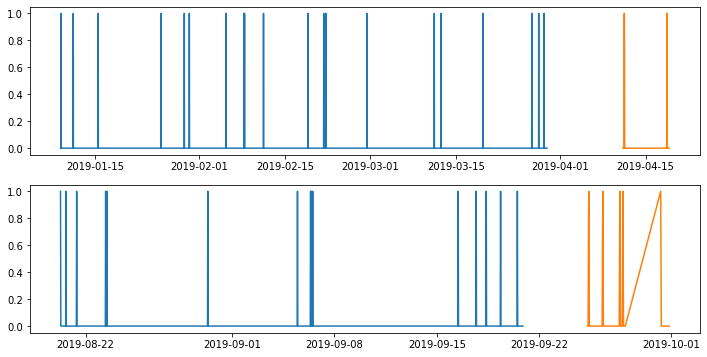

In [61]:
train_clone = train_clone.set_index('Timestamp')
test_clone = test_clone.set_index('Timestamp')
train_clone2 = train_clone2.set_index('Timestamp')
test_clone2 = test_clone2.set_index('Timestamp')

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(train_clone)
plt.plot(test_clone)
plt.subplot(212)
plt.plot(train_clone2)
plt.plot(test_clone2)

In [62]:
df_prophet = train[['Timestamp', 'Demand']]
df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
df_prophet

,ds,y
0,2019-01-09 07:00:00,0
1,2019-01-09 07:30:00,0
2,2019-01-09 08:00:00,0
3,2019-01-09 08:30:00,0
4,2019-01-09 09:00:00,1
...,...,...
517,2019-03-29 19:00:00,0
518,2019-03-29 19:30:00,0
519,2019-03-29 20:00:00,0
520,2019-03-29 20:30:00,0


In [63]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)
df_prophet['cap'] = 10
df_prophet['floor'] = 0
m = Prophet(growth='logistic', changepoint_prior_scale=0.2)
#best: yhat scale 0.6 round at 3.7, yhat_upper 0.8 round at 8
# m = Prophet(changepoint_prior_scale=0.3)
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [64]:
future = m.make_future_dataframe(periods=800, freq='H')
future['cap'] = 10
future['floor'] = 0
future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
future = future[future['ds'].dt.dayofweek < 5]
forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat']:
    if(each < 0):
        each = 0
    elif ((each*10)%10 >= 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    yhat_round.append(each)
# forecast['yhat_round'] = yhat_round
# forecast[['ds', 'yhat_round', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast['yhat_nr'] = forecast['yhat']
forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_nr,yhat_lower,yhat_upper
0,2019-01-09 07:00:00,0,-0.046424,-0.269380,0.198221
1,2019-01-09 07:30:00,0,0.054346,-0.181291,0.283794
2,2019-01-09 08:00:00,0,0.121110,-0.118349,0.381627
3,2019-01-09 08:30:00,0,0.152085,-0.101958,0.386131
4,2019-01-09 09:00:00,0,0.152763,-0.087560,0.381524
...,...,...,...,...,...
862,2019-05-01 17:00:00,0,0.027993,-0.226946,0.270227
863,2019-05-01 18:00:00,0,0.048596,-0.195854,0.285942
864,2019-05-01 19:00:00,0,0.027511,-0.216131,0.260677
865,2019-05-01 20:00:00,0,-0.009829,-0.254153,0.231026


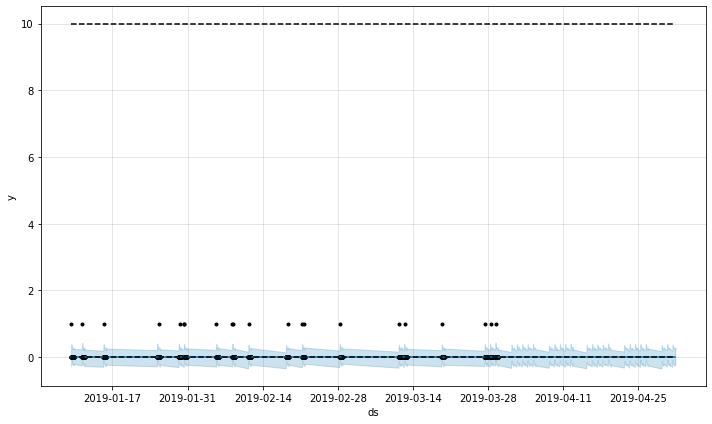

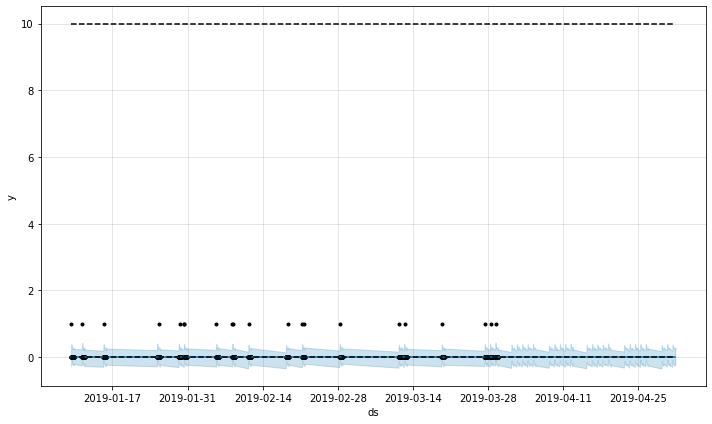

In [65]:
m.plot(forecast)

In [66]:
def join_eva(train, forecast, prediction_size):
    forecast = forecast[:prediction_size]
    
    return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))

def cal_SMAPE(df):
    smape = 100/len(df) * np.sum(2 * np.abs(df['yhat'] - df['y']) / (np.abs(df['y']) + np.abs(df['yhat'])))
    print(df)
    
    return 'sMAPE', smape, 'accuracy', 100-smape

In [67]:
train = join_eva(df_prophet, forecast, len(df_prophet))

print(cal_SMAPE(train))

                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.046424   -0.269380    0.198221  0   10      0
2019-01-09 07:30:00     0  0.054346   -0.181291    0.283794  0   10      0
2019-01-09 08:00:00     0  0.121110   -0.118349    0.381627  0   10      0
2019-01-09 08:30:00     0  0.152085   -0.101958    0.386131  0   10      0
2019-01-09 09:00:00     0  0.152763   -0.087560    0.381524  1   10      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.014241   -0.239777    0.259853  0   10      0
2019-03-29 19:30:00     0 -0.008974   -0.262283    0.254493  0   10      0
2019-03-29 20:00:00     0 -0.027600   -0.278026    0.208449  0   10      0
2019-03-29 20:30:00     0 -0.029907   -0.271218    0.224717  0   10      0
2019-03-29 21:00:00     0 -0.005385   -0.240159    0.228411  0   10      0

[522 rows x 7 columns]
(

In [72]:
def join_test(test, forecast, prediction_size):
    df_test = test.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
    forecast = forecast[len(df_prophet):len(df_prophet)+prediction_size+210]
    joined = forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(df_test.set_index('ds'))
    
    return joined.fillna(0)

In [73]:
eva_df = join_test(test, forecast, prediction_size)

print(cal_SMAPE(eva_df))

                     yhat   yhat_nr  yhat_lower  yhat_upper    y
ds                                                              
2019-04-01 07:00:00     0 -0.084412   -0.324274    0.153207  0.0
2019-04-01 08:00:00     0  0.087995   -0.163775    0.337191  0.0
2019-04-01 09:00:00     0  0.124221   -0.112027    0.369685  0.0
2019-04-01 10:00:00     0  0.081109   -0.151614    0.308612  0.0
2019-04-01 11:00:00     0  0.039431   -0.195240    0.283165  0.0
...                   ...       ...         ...         ...  ...
2019-04-30 17:00:00     0  0.023393   -0.220348    0.274786  0.0
2019-04-30 18:00:00     0  0.044296   -0.190995    0.294894  0.0
2019-04-30 19:00:00     0  0.023637   -0.233680    0.268709  0.0
2019-04-30 20:00:00     0 -0.013165   -0.266596    0.239515  0.0
2019-04-30 21:00:00     0  0.014553   -0.240941    0.248639  0.0

[330 rows x 5 columns]
('sMAPE', 1.8181818181818183, 'accuracy', 98.18181818181819)


In [76]:
eva_df.tail(150)

,yhat,yhat_nr,yhat_lower,yhat_upper,y
ds,,,,,
2019-04-17 07:00:00,0,-0.046424,-0.287100,0.201142,0.0
2019-04-17 08:00:00,0,0.121110,-0.113020,0.370957,0.0
2019-04-17 09:00:00,0,0.152763,-0.086172,0.375743,0.0
2019-04-17 10:00:00,0,0.105384,-0.148916,0.339787,0.0
2019-04-17 11:00:00,0,0.059748,-0.195315,0.298525,0.0
...,...,...,...,...,...
2019-04-30 17:00:00,0,0.023393,-0.220348,0.274786,0.0
2019-04-30 18:00:00,0,0.044296,-0.190995,0.294894,0.0
2019-04-30 19:00:00,0,0.023637,-0.233680,0.268709,0.0


In [77]:
scales = np.arange(0.1,1.0,0.1)
rounding_boundary = np.arange(1, 10, 1)

def grid_search():
    scale = [] 
    round_at = []
    eva_acc = []
    test_acc = []
    for param in scales:
        for boundary in rounding_boundary:
            scale.append(param)
            round_at.append(boundary)
            df_prophet['cap'] = 5
            df_prophet['floor'] = 0
            m = Prophet(growth='logistic', changepoint_prior_scale=param)
#             m = Prophet(changepoint_prior_scale=param) 
            m.fit(df_prophet)
            future = m.make_future_dataframe(periods=768, freq='H')
            future['cap'] = 5
            future['floor'] = 0
            future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
            future = future[future['ds'].dt.dayofweek < 5]
            forecast = m.predict(future)
            yhat_round = []            
            for each in forecast['yhat_upper']:
                if (each < 0):
                    each = 0
                elif (((each*10)%10) >= boundary):
                    each = math.ceil(each)
                else:
                    each = math.floor(each)
                yhat_round.append(each)
            forecast['yhat_nr'] = forecast['yhat']
            forecast['yhat'] = yhat_round

            train = join_eva(df_prophet, forecast, len(df_prophet))
            acc = cal_SMAPE(train)
            eva_acc.append(acc)

            eva_df = join_test(test, forecast, prediction_size)
            acc = cal_SMAPE(eva_df)
            test_acc.append(acc)
    
    return scale, round_at, eva_acc, test_acc

In [78]:
scale, round_at, eva_acc, test_acc = grid_search()
grid = {'Scale': scale, 'Round at': round_at, 'Fit': eva_acc, 'Test': test_acc}    
df_grid = pd.DataFrame(grid)
df_grid

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.044395   -0.292076    0.187552  0    5      0
2019-01-09 07:30:00     1  0.053988   -0.173571    0.294625  0    5      0
2019-01-09 08:00:00     1  0.119648   -0.127023    0.358999  0    5      0
2019-01-09 08:30:00     1  0.150596   -0.079480    0.384715  0    5      0
2019-01-09 09:00:00     1  0.151916   -0.089567    0.399426  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.015486   -0.233469    0.258510  0    5      0
2019-03-29 19:30:00     1 -0.006889   -0.241452    0.234879  0    5      0
2019-03-29 20:00:00     1 -0.025410   -0.262651    0.220262  0    5      0
2019-03-29 20:30:00     1 -0.028884   -0.267800    0.228196  0    5      0
2019-03-29 21:00:00     1 -0.007151   -0.238738    0.238354  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.298843    0.197547  0    5      0
2019-01-09 07:30:00     1  0.053988   -0.184275    0.290445  0    5      0
2019-01-09 08:00:00     1  0.119648   -0.130577    0.370393  0    5      0
2019-01-09 08:30:00     1  0.150596   -0.096924    0.388713  0    5      0
2019-01-09 09:00:00     1  0.151916   -0.095612    0.397808  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.015486   -0.232196    0.256656  0    5      0
2019-03-29 19:30:00     1 -0.006889   -0.239144    0.236300  0    5      0
2019-03-29 20:00:00     1 -0.025410   -0.278829    0.236324  0    5      0
2019-03-29 20:30:00     1 -0.028884   -0.286113    0.229247  0    5      0
2019-03-29 21:00:00     1 -0.007151   -0.246436    0.241742  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.286777    0.218272  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.193195    0.290745  0    5      0
2019-01-09 08:00:00     1  0.119648   -0.126229    0.353717  0    5      0
2019-01-09 08:30:00     1  0.150596   -0.096898    0.423830  0    5      0
2019-01-09 09:00:00     1  0.151916   -0.088734    0.403488  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.212186    0.250797  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.255438    0.241878  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.271238    0.210730  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.278975    0.213073  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.254423    0.225715  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.297833    0.211149  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.191517    0.282029  0    5      0
2019-01-09 08:00:00     0  0.119648   -0.147370    0.383695  0    5      0
2019-01-09 08:30:00     1  0.150596   -0.084065    0.402183  0    5      0
2019-01-09 09:00:00     0  0.151916   -0.123383    0.398310  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.223259    0.244764  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.249200    0.232150  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.273845    0.218873  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.267952    0.221035  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.246307    0.218546  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.278432    0.204887  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.184283    0.292281  0    5      0
2019-01-09 08:00:00     0  0.119648   -0.137737    0.361865  0    5      0
2019-01-09 08:30:00     0  0.150596   -0.091265    0.412500  0    5      0
2019-01-09 09:00:00     0  0.151916   -0.089740    0.393417  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.226849    0.252459  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.249544    0.242533  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.260269    0.222966  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.252133    0.226946  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.251980    0.231017  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.289218    0.182847  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.199434    0.304033  0    5      0
2019-01-09 08:00:00     0  0.119648   -0.121278    0.359228  0    5      0
2019-01-09 08:30:00     0  0.150596   -0.100978    0.393453  0    5      0
2019-01-09 09:00:00     0  0.151916   -0.078140    0.398971  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.223703    0.255982  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.261482    0.232526  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.281563    0.235351  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.260921    0.228297  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.259505    0.235388  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.292083    0.199262  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.192402    0.297582  0    5      0
2019-01-09 08:00:00     0  0.119648   -0.133699    0.368526  0    5      0
2019-01-09 08:30:00     0  0.150596   -0.083393    0.398553  0    5      0
2019-01-09 09:00:00     0  0.151916   -0.084042    0.406803  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.230922    0.256368  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.257892    0.245516  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.266368    0.227019  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.269925    0.215822  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.263678    0.237856  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.284903    0.193983  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.180424    0.291562  0    5      0
2019-01-09 08:00:00     0  0.119648   -0.121094    0.370205  0    5      0
2019-01-09 08:30:00     0  0.150596   -0.093625    0.418313  0    5      0
2019-01-09 09:00:00     0  0.151916   -0.097178    0.402115  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.222482    0.279583  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.253838    0.242978  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.272053    0.216623  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.273488    0.210513  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.261709    0.250270  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.044395   -0.302261    0.202629  0    5      0
2019-01-09 07:30:00     0  0.053988   -0.181716    0.295807  0    5      0
2019-01-09 08:00:00     0  0.119648   -0.124950    0.355549  0    5      0
2019-01-09 08:30:00     0  0.150596   -0.095520    0.385531  0    5      0
2019-01-09 09:00:00     0  0.151916   -0.076495    0.395569  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015486   -0.242982    0.257706  0    5      0
2019-03-29 19:30:00     0 -0.006889   -0.249783    0.239888  0    5      0
2019-03-29 20:00:00     0 -0.025410   -0.270667    0.218933  0    5      0
2019-03-29 20:30:00     0 -0.028884   -0.270753    0.217399  0    5      0
2019-03-29 21:00:00     0 -0.007151   -0.257017    0.224479  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.045351   -0.304310    0.201632  0    5      0
2019-01-09 07:30:00     1  0.053974   -0.183088    0.287829  0    5      0
2019-01-09 08:00:00     1  0.120130   -0.123493    0.361085  0    5      0
2019-01-09 08:30:00     1  0.151169   -0.076880    0.405162  0    5      0
2019-01-09 09:00:00     1  0.152303   -0.105122    0.399543  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.015037   -0.224337    0.262618  0    5      0
2019-03-29 19:30:00     1 -0.007636   -0.237535    0.254333  0    5      0
2019-03-29 20:00:00     1 -0.026232   -0.274755    0.206328  0    5      0
2019-03-29 20:30:00     1 -0.029358   -0.275322    0.224636  0    5      0
2019-03-29 21:00:00     1 -0.006710   -0.257043    0.231109  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.294886    0.183310  0    5      0
2019-01-09 07:30:00     1  0.053974   -0.193830    0.288745  0    5      0
2019-01-09 08:00:00     1  0.120130   -0.113122    0.365199  0    5      0
2019-01-09 08:30:00     1  0.151169   -0.076533    0.394238  0    5      0
2019-01-09 09:00:00     1  0.152303   -0.086077    0.391846  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.015037   -0.238083    0.265423  0    5      0
2019-03-29 19:30:00     1 -0.007636   -0.272682    0.210798  0    5      0
2019-03-29 20:00:00     1 -0.026232   -0.259013    0.204317  0    5      0
2019-03-29 20:30:00     1 -0.029358   -0.275909    0.202644  0    5      0
2019-03-29 21:00:00     1 -0.006710   -0.245408    0.225346  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.278550    0.208810  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.192516    0.295543  0    5      0
2019-01-09 08:00:00     1  0.120130   -0.122324    0.372752  0    5      0
2019-01-09 08:30:00     1  0.151169   -0.099321    0.402221  0    5      0
2019-01-09 09:00:00     1  0.152303   -0.081597    0.383500  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.228827    0.261888  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.258789    0.242489  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.279571    0.204834  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.263436    0.216748  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.244651    0.226469  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.297703    0.214963  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.191886    0.305617  0    5      0
2019-01-09 08:00:00     0  0.120130   -0.135844    0.347052  0    5      0
2019-01-09 08:30:00     0  0.151169   -0.092721    0.396463  0    5      0
2019-01-09 09:00:00     0  0.152303   -0.077569    0.390505  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.226097    0.265453  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.254388    0.224142  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.262067    0.228692  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.264363    0.230279  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.237010    0.249894  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.285089    0.204467  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.191805    0.285452  0    5      0
2019-01-09 08:00:00     0  0.120130   -0.109884    0.365647  0    5      0
2019-01-09 08:30:00     0  0.151169   -0.086941    0.395016  0    5      0
2019-01-09 09:00:00     0  0.152303   -0.114813    0.393190  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.230134    0.265854  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.245070    0.225828  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.268057    0.223542  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.282824    0.202211  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.245289    0.247171  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.287758    0.206636  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.174215    0.306605  0    5      0
2019-01-09 08:00:00     0  0.120130   -0.119716    0.356661  0    5      0
2019-01-09 08:30:00     0  0.151169   -0.094600    0.396074  0    5      0
2019-01-09 09:00:00     0  0.152303   -0.093380    0.386561  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.236686    0.257578  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.249688    0.215753  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.280514    0.220415  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.276744    0.228119  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.247930    0.226695  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.302023    0.205144  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.175178    0.320032  0    5      0
2019-01-09 08:00:00     0  0.120130   -0.118892    0.363305  0    5      0
2019-01-09 08:30:00     0  0.151169   -0.092397    0.396031  0    5      0
2019-01-09 09:00:00     0  0.152303   -0.097985    0.389813  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.229769    0.246095  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.238212    0.237218  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.261929    0.227862  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.274098    0.217109  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.245219    0.239292  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.286263    0.201213  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.189951    0.292872  0    5      0
2019-01-09 08:00:00     0  0.120130   -0.116828    0.351054  0    5      0
2019-01-09 08:30:00     0  0.151169   -0.075375    0.366999  0    5      0
2019-01-09 09:00:00     0  0.152303   -0.082735    0.397833  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.215176    0.257411  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.261321    0.234145  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.260072    0.221693  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.284624    0.215989  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.251617    0.227646  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.045351   -0.281034    0.184731  0    5      0
2019-01-09 07:30:00     0  0.053974   -0.178350    0.302226  0    5      0
2019-01-09 08:00:00     0  0.120130   -0.133726    0.366744  0    5      0
2019-01-09 08:30:00     0  0.151169   -0.099677    0.384373  0    5      0
2019-01-09 09:00:00     0  0.152303   -0.082788    0.404561  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015037   -0.243825    0.258467  0    5      0
2019-03-29 19:30:00     0 -0.007636   -0.251506    0.243911  0    5      0
2019-03-29 20:00:00     0 -0.026232   -0.267306    0.213676  0    5      0
2019-03-29 20:30:00     0 -0.029358   -0.268858    0.224532  0    5      0
2019-03-29 21:00:00     0 -0.006710   -0.246339    0.258307  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.038928   -0.278442    0.191829  0    5      0
2019-01-09 07:30:00     1  0.053623   -0.163092    0.294119  0    5      0
2019-01-09 08:00:00     1  0.117075   -0.132470    0.363231  0    5      0
2019-01-09 08:30:00     1  0.148465   -0.091750    0.395650  0    5      0
2019-01-09 09:00:00     1  0.151595   -0.105712    0.406185  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.015173   -0.223659    0.260996  0    5      0
2019-03-29 19:30:00     1 -0.006409   -0.251282    0.242773  0    5      0
2019-03-29 20:00:00     1 -0.025787   -0.281495    0.217541  0    5      0
2019-03-29 20:30:00     1 -0.032506   -0.265937    0.214119  0    5      0
2019-03-29 21:00:00     1 -0.016616   -0.248210    0.215436  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.038928   -0.315252    0.202836  0    5      0
2019-01-09 07:30:00     1  0.053623   -0.163300    0.297940  0    5      0
2019-01-09 08:00:00     1  0.117075   -0.116850    0.378779  0    5      0
2019-01-09 08:30:00     1  0.148465   -0.089992    0.385480  0    5      0
2019-01-09 09:00:00     1  0.151595   -0.088400    0.380398  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.015173   -0.221694    0.263117  0    5      0
2019-03-29 19:30:00     1 -0.006409   -0.239856    0.261150  0    5      0
2019-03-29 20:00:00     1 -0.025787   -0.251688    0.242508  0    5      0
2019-03-29 20:30:00     1 -0.032506   -0.286912    0.202236  0    5      0
2019-03-29 21:00:00     1 -0.016616   -0.269573    0.238244  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.283951    0.205850  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.200456    0.299259  0    5      0
2019-01-09 08:00:00     1  0.117075   -0.133921    0.352519  0    5      0
2019-01-09 08:30:00     1  0.148465   -0.093428    0.396359  0    5      0
2019-01-09 09:00:00     1  0.151595   -0.101030    0.398596  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.224122    0.253481  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.255872    0.226705  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.259492    0.214377  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.271957    0.210126  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.244621    0.233921  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.271591    0.210679  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.187487    0.301033  0    5      0
2019-01-09 08:00:00     0  0.117075   -0.139658    0.368970  0    5      0
2019-01-09 08:30:00     0  0.148465   -0.096597    0.377530  0    5      0
2019-01-09 09:00:00     0  0.151595   -0.093079    0.395393  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.251431    0.224425  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.252130    0.221963  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.251332    0.205967  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.284491    0.220500  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.257855    0.227836  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.283071    0.198347  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.193602    0.303803  0    5      0
2019-01-09 08:00:00     0  0.117075   -0.120425    0.361365  0    5      0
2019-01-09 08:30:00     0  0.148465   -0.101895    0.397068  0    5      0
2019-01-09 09:00:00     0  0.151595   -0.080485    0.401345  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.223517    0.258609  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.258851    0.229279  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.283955    0.217356  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.274392    0.222957  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.255723    0.224958  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.296639    0.198940  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.193829    0.275328  0    5      0
2019-01-09 08:00:00     0  0.117075   -0.129550    0.374023  0    5      0
2019-01-09 08:30:00     0  0.148465   -0.120846    0.386829  0    5      0
2019-01-09 09:00:00     0  0.151595   -0.080371    0.385643  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.211408    0.257645  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.251023    0.244755  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.256644    0.226186  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.280562    0.212445  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.255675    0.235629  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.278094    0.218423  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.173308    0.301524  0    5      0
2019-01-09 08:00:00     0  0.117075   -0.136458    0.363366  0    5      0
2019-01-09 08:30:00     0  0.148465   -0.104784    0.376396  0    5      0
2019-01-09 09:00:00     0  0.151595   -0.090593    0.398886  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.246614    0.234093  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.261277    0.240881  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.249984    0.216060  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.277915    0.206265  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.250108    0.211349  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.293135    0.210886  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.207278    0.287991  0    5      0
2019-01-09 08:00:00     0  0.117075   -0.128130    0.373504  0    5      0
2019-01-09 08:30:00     0  0.148465   -0.097053    0.379631  0    5      0
2019-01-09 09:00:00     0  0.151595   -0.114262    0.397557  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.248262    0.257948  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.251574    0.230369  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.274292    0.217400  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.262410    0.208955  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.266965    0.206417  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.038928   -0.278308    0.206792  0    5      0
2019-01-09 07:30:00     0  0.053623   -0.200143    0.287779  0    5      0
2019-01-09 08:00:00     0  0.117075   -0.134721    0.348543  0    5      0
2019-01-09 08:30:00     0  0.148465   -0.100243    0.397400  0    5      0
2019-01-09 09:00:00     0  0.151595   -0.093963    0.387279  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.015173   -0.218276    0.249227  0    5      0
2019-03-29 19:30:00     0 -0.006409   -0.250790    0.239191  0    5      0
2019-03-29 20:00:00     0 -0.025787   -0.286648    0.204141  0    5      0
2019-03-29 20:30:00     0 -0.032506   -0.274837    0.210219  0    5      0
2019-03-29 21:00:00     0 -0.016616   -0.251370    0.235918  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.043178   -0.287163    0.207927  0    5      0
2019-01-09 07:30:00     1  0.054021   -0.187611    0.306426  0    5      0
2019-01-09 08:00:00     1  0.119619   -0.123323    0.367033  0    5      0
2019-01-09 08:30:00     1  0.151079   -0.109498    0.395347  0    5      0
2019-01-09 09:00:00     1  0.153004   -0.090272    0.409741  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013143   -0.218680    0.270809  0    5      0
2019-03-29 19:30:00     1 -0.009799   -0.257599    0.228234  0    5      0
2019-03-29 20:00:00     1 -0.029287   -0.278038    0.218565  0    5      0
2019-03-29 20:30:00     1 -0.033976   -0.275217    0.210933  0    5      0
2019-03-29 21:00:00     1 -0.013359   -0.263158    0.242813  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.292740    0.182536  0    5      0
2019-01-09 07:30:00     1  0.054021   -0.190312    0.297356  0    5      0
2019-01-09 08:00:00     1  0.119619   -0.121545    0.354854  0    5      0
2019-01-09 08:30:00     1  0.151079   -0.080187    0.387858  0    5      0
2019-01-09 09:00:00     1  0.153004   -0.091327    0.392740  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013143   -0.232477    0.246183  0    5      0
2019-03-29 19:30:00     1 -0.009799   -0.250763    0.220581  0    5      0
2019-03-29 20:00:00     1 -0.029287   -0.254133    0.222553  0    5      0
2019-03-29 20:30:00     1 -0.033976   -0.272271    0.208583  0    5      0
2019-03-29 21:00:00     1 -0.013359   -0.261950    0.225824  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.286355    0.200637  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.207312    0.291792  0    5      0
2019-01-09 08:00:00     1  0.119619   -0.117909    0.373540  0    5      0
2019-01-09 08:30:00     1  0.151079   -0.093997    0.386044  0    5      0
2019-01-09 09:00:00     1  0.153004   -0.087026    0.404624  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.226208    0.259165  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.256945    0.224709  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.273992    0.199762  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.279309    0.198386  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.290589    0.232923  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.279888    0.186345  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.193356    0.298102  0    5      0
2019-01-09 08:00:00     0  0.119619   -0.133988    0.354184  0    5      0
2019-01-09 08:30:00     1  0.151079   -0.073445    0.403514  0    5      0
2019-01-09 09:00:00     0  0.153004   -0.103335    0.391176  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.234500    0.263251  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.243815    0.220827  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.279578    0.219768  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.278877    0.225816  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.263159    0.229555  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.281259    0.187748  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.180511    0.289244  0    5      0
2019-01-09 08:00:00     0  0.119619   -0.110815    0.370979  0    5      0
2019-01-09 08:30:00     0  0.151079   -0.088975    0.398275  0    5      0
2019-01-09 09:00:00     0  0.153004   -0.089048    0.401151  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.219465    0.284515  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.264828    0.250335  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.256670    0.218623  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.257520    0.216278  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.258066    0.228334  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.283980    0.197714  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.200526    0.280564  0    5      0
2019-01-09 08:00:00     0  0.119619   -0.117686    0.381175  0    5      0
2019-01-09 08:30:00     0  0.151079   -0.103463    0.393823  0    5      0
2019-01-09 09:00:00     0  0.153004   -0.063055    0.402928  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.238045    0.263504  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.247883    0.230049  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.269397    0.218074  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.272982    0.206076  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.277728    0.233089  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.278200    0.215426  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.191765    0.301337  0    5      0
2019-01-09 08:00:00     0  0.119619   -0.110531    0.375032  0    5      0
2019-01-09 08:30:00     0  0.151079   -0.104211    0.400608  0    5      0
2019-01-09 09:00:00     0  0.153004   -0.088243    0.396946  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.227186    0.254943  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.254576    0.231903  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.279768    0.217801  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.284377    0.221900  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.250931    0.225017  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.275932    0.203470  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.177540    0.323755  0    5      0
2019-01-09 08:00:00     0  0.119619   -0.134615    0.361659  0    5      0
2019-01-09 08:30:00     0  0.151079   -0.096219    0.411262  0    5      0
2019-01-09 09:00:00     0  0.153004   -0.089422    0.391832  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.227885    0.271245  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.254359    0.234160  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.292684    0.199015  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.287202    0.217398  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.256157    0.211272  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043178   -0.281414    0.199739  0    5      0
2019-01-09 07:30:00     0  0.054021   -0.196550    0.314508  0    5      0
2019-01-09 08:00:00     0  0.119619   -0.108578    0.340765  0    5      0
2019-01-09 08:30:00     0  0.151079   -0.090961    0.412409  0    5      0
2019-01-09 09:00:00     0  0.153004   -0.087819    0.381233  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013143   -0.245893    0.251948  0    5      0
2019-03-29 19:30:00     0 -0.009799   -0.249042    0.228821  0    5      0
2019-03-29 20:00:00     0 -0.029287   -0.281448    0.212968  0    5      0
2019-03-29 20:30:00     0 -0.033976   -0.275386    0.183560  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.258581    0.224037  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.034375   -0.264613    0.210292  0    5      0
2019-01-09 07:30:00     1  0.030595   -0.219926    0.274444  0    5      0
2019-01-09 08:00:00     1  0.092159   -0.159396    0.312576  0    5      0
2019-01-09 08:30:00     1  0.133006   -0.109782    0.353438  0    5      0
2019-01-09 09:00:00     1  0.146124   -0.108996    0.389890  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.016952   -0.228278    0.259661  0    5      0
2019-03-29 19:30:00     1 -0.016012   -0.238160    0.233418  0    5      0
2019-03-29 20:00:00     1 -0.044574   -0.289702    0.200084  0    5      0
2019-03-29 20:30:00     1 -0.046344   -0.280706    0.195117  0    5      0
2019-03-29 21:00:00     1  0.003638   -0.224383    0.247235  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.278698    0.197975  0    5      0
2019-01-09 07:30:00     1  0.030595   -0.224458    0.288786  0    5      0
2019-01-09 08:00:00     1  0.092159   -0.145066    0.341596  0    5      0
2019-01-09 08:30:00     1  0.133006   -0.101427    0.384746  0    5      0
2019-01-09 09:00:00     1  0.146124   -0.094839    0.394578  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.016952   -0.204738    0.273741  0    5      0
2019-03-29 19:30:00     1 -0.016012   -0.247371    0.230611  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.276882    0.197288  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.304805    0.199672  0    5      0
2019-03-29 21:00:00     1  0.003638   -0.234626    0.252118  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.275135    0.208596  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.203846    0.275638  0    5      0
2019-01-09 08:00:00     1  0.092159   -0.142589    0.345313  0    5      0
2019-01-09 08:30:00     1  0.133006   -0.109732    0.390985  0    5      0
2019-01-09 09:00:00     1  0.146124   -0.101805    0.387208  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.210324    0.253579  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.256281    0.218978  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.286888    0.197618  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.301731    0.205307  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.243771    0.260266  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.276892    0.183820  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.213085    0.292236  0    5      0
2019-01-09 08:00:00     0  0.092159   -0.156238    0.331753  0    5      0
2019-01-09 08:30:00     0  0.133006   -0.118773    0.379672  0    5      0
2019-01-09 09:00:00     0  0.146124   -0.097033    0.396214  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.228800    0.273150  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.267014    0.214370  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.287705    0.198354  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.277311    0.188661  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.251844    0.248130  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.272354    0.203914  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.197068    0.266122  0    5      0
2019-01-09 08:00:00     0  0.092159   -0.141075    0.326926  0    5      0
2019-01-09 08:30:00     0  0.133006   -0.115639    0.384483  0    5      0
2019-01-09 09:00:00     0  0.146124   -0.117378    0.373933  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.219739    0.257165  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.258525    0.215926  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.295259    0.194266  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.294788    0.199845  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.239464    0.252336  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.266608    0.223085  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.225140    0.284621  0    5      0
2019-01-09 08:00:00     0  0.092159   -0.152951    0.348819  0    5      0
2019-01-09 08:30:00     0  0.133006   -0.110294    0.365201  0    5      0
2019-01-09 09:00:00     0  0.146124   -0.104580    0.373587  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.223152    0.247382  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.271029    0.228167  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.288546    0.184314  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.299438    0.191219  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.237462    0.265652  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.268713    0.220733  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.201475    0.274262  0    5      0
2019-01-09 08:00:00     0  0.092159   -0.147920    0.362379  0    5      0
2019-01-09 08:30:00     0  0.133006   -0.086544    0.383389  0    5      0
2019-01-09 09:00:00     0  0.146124   -0.112959    0.394892  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.226334    0.261855  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.258385    0.233445  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.288229    0.216102  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.284477    0.196496  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.241154    0.237883  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.286481    0.201549  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.204176    0.280390  0    5      0
2019-01-09 08:00:00     0  0.092159   -0.149507    0.329558  0    5      0
2019-01-09 08:30:00     0  0.133006   -0.104281    0.376496  0    5      0
2019-01-09 09:00:00     0  0.146124   -0.096817    0.398045  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.213572    0.264761  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.264809    0.222840  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.267039    0.216785  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.293699    0.206965  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.266685    0.240457  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.034375   -0.268776    0.201830  0    5      0
2019-01-09 07:30:00     0  0.030595   -0.198979    0.268097  0    5      0
2019-01-09 08:00:00     0  0.092159   -0.146079    0.348148  0    5      0
2019-01-09 08:30:00     0  0.133006   -0.112088    0.382015  0    5      0
2019-01-09 09:00:00     0  0.146124   -0.093939    0.389350  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.016952   -0.230455    0.262062  0    5      0
2019-03-29 19:30:00     0 -0.016012   -0.256197    0.234867  0    5      0
2019-03-29 20:00:00     0 -0.044574   -0.289251    0.198665  0    5      0
2019-03-29 20:30:00     0 -0.046344   -0.285872    0.182395  0    5      0
2019-03-29 21:00:00     0  0.003638   -0.243640    0.271497  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.042774   -0.271818    0.197689  0    5      0
2019-01-09 07:30:00     1  0.054004   -0.172838    0.297543  0    5      0
2019-01-09 08:00:00     1  0.119367   -0.113240    0.363149  0    5      0
2019-01-09 08:30:00     1  0.150779   -0.090588    0.400086  0    5      0
2019-01-09 09:00:00     1  0.152788   -0.089957    0.407877  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013499   -0.221465    0.248301  0    5      0
2019-03-29 19:30:00     1 -0.009243   -0.245155    0.230370  0    5      0
2019-03-29 20:00:00     1 -0.028668   -0.265973    0.219019  0    5      0
2019-03-29 20:30:00     1 -0.033551   -0.289483    0.214652  0    5      0
2019-03-29 21:00:00     1 -0.013484   -0.243749    0.238306  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.042774   -0.282813    0.202904  0    5      0
2019-01-09 07:30:00     1  0.054004   -0.195283    0.287282  0    5      0
2019-01-09 08:00:00     1  0.119367   -0.106339    0.353064  0    5      0
2019-01-09 08:30:00     1  0.150779   -0.094802    0.392686  0    5      0
2019-01-09 09:00:00     1  0.152788   -0.105388    0.395207  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013499   -0.219294    0.256306  0    5      0
2019-03-29 19:30:00     1 -0.009243   -0.272950    0.212161  0    5      0
2019-03-29 20:00:00     1 -0.028668   -0.254819    0.231153  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.322695    0.186339  0    5      0
2019-03-29 21:00:00     1 -0.013484   -0.264123    0.228081  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.284771    0.199255  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.185873    0.297556  0    5      0
2019-01-09 08:00:00     1  0.119367   -0.142868    0.357685  0    5      0
2019-01-09 08:30:00     1  0.150779   -0.102305    0.398206  0    5      0
2019-01-09 09:00:00     1  0.152788   -0.073511    0.392043  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.224807    0.266150  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.257795    0.236989  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.279457    0.210660  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.261209    0.223260  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.239993    0.220167  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.286767    0.190802  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.196752    0.310159  0    5      0
2019-01-09 08:00:00     0  0.119367   -0.132844    0.365925  0    5      0
2019-01-09 08:30:00     0  0.150779   -0.092475    0.391204  0    5      0
2019-01-09 09:00:00     1  0.152788   -0.090431    0.415101  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.238110    0.259373  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.262539    0.233517  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.267818    0.228689  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.276448    0.195627  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.246955    0.228104  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.284355    0.211142  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.194347    0.308953  0    5      0
2019-01-09 08:00:00     0  0.119367   -0.118938    0.363642  0    5      0
2019-01-09 08:30:00     0  0.150779   -0.103232    0.390343  0    5      0
2019-01-09 09:00:00     0  0.152788   -0.085041    0.398451  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.232244    0.244840  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.268831    0.238838  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.268937    0.225592  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.280608    0.219310  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.264251    0.252758  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.302237    0.207581  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.191998    0.278025  0    5      0
2019-01-09 08:00:00     0  0.119367   -0.135247    0.353267  0    5      0
2019-01-09 08:30:00     0  0.150779   -0.081184    0.384345  0    5      0
2019-01-09 09:00:00     0  0.152788   -0.090167    0.384190  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.224092    0.258564  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.262116    0.247054  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.273220    0.210579  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.269424    0.214388  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.254466    0.226599  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.264112    0.222819  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.168596    0.311093  0    5      0
2019-01-09 08:00:00     0  0.119367   -0.125511    0.355261  0    5      0
2019-01-09 08:30:00     0  0.150779   -0.118103    0.388463  0    5      0
2019-01-09 09:00:00     0  0.152788   -0.098629    0.375944  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.226105    0.251719  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.240934    0.225365  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.264224    0.219992  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.272687    0.217505  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.248057    0.216859  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.284162    0.194238  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.177611    0.295289  0    5      0
2019-01-09 08:00:00     0  0.119367   -0.121554    0.343944  0    5      0
2019-01-09 08:30:00     0  0.150779   -0.086144    0.380547  0    5      0
2019-01-09 09:00:00     0  0.152788   -0.089293    0.392023  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.223101    0.265850  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.237546    0.248972  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.270686    0.200049  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.299151    0.216891  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.239446    0.228185  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042774   -0.275866    0.197030  0    5      0
2019-01-09 07:30:00     0  0.054004   -0.180741    0.294727  0    5      0
2019-01-09 08:00:00     0  0.119367   -0.114533    0.376921  0    5      0
2019-01-09 08:30:00     0  0.150779   -0.095267    0.400127  0    5      0
2019-01-09 09:00:00     0  0.152788   -0.092132    0.400028  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013499   -0.229172    0.270461  0    5      0
2019-03-29 19:30:00     0 -0.009243   -0.249583    0.235694  0    5      0
2019-03-29 20:00:00     0 -0.028668   -0.260787    0.206756  0    5      0
2019-03-29 20:30:00     0 -0.033551   -0.271914    0.209953  0    5      0
2019-03-29 21:00:00     0 -0.013484   -0.261859    0.237224  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.042868   -0.299730    0.191527  0    5      0
2019-01-09 07:30:00     1  0.053970   -0.207277    0.291998  0    5      0
2019-01-09 08:00:00     1  0.119368   -0.138300    0.331743  0    5      0
2019-01-09 08:30:00     1  0.150790   -0.103947    0.391580  0    5      0
2019-01-09 09:00:00     1  0.152794   -0.104975    0.386388  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013943   -0.219903    0.267271  0    5      0
2019-03-29 19:30:00     1 -0.008778   -0.251680    0.234292  0    5      0
2019-03-29 20:00:00     1 -0.028178   -0.282501    0.191251  0    5      0
2019-03-29 20:30:00     1 -0.033025   -0.271378    0.192123  0    5      0
2019-03-29 21:00:00     1 -0.012901   -0.262359    0.233422  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.042868   -0.273199    0.204413  0    5      0
2019-01-09 07:30:00     1  0.053970   -0.186459    0.301618  0    5      0
2019-01-09 08:00:00     1  0.119368   -0.144695    0.359685  0    5      0
2019-01-09 08:30:00     1  0.150790   -0.095753    0.402380  0    5      0
2019-01-09 09:00:00     1  0.152794   -0.078979    0.407845  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013943   -0.215426    0.273020  0    5      0
2019-03-29 19:30:00     1 -0.008778   -0.270124    0.219856  0    5      0
2019-03-29 20:00:00     1 -0.028178   -0.277455    0.205206  0    5      0
2019-03-29 20:30:00     1 -0.033025   -0.297418    0.215460  0    5      0
2019-03-29 21:00:00     1 -0.012901   -0.236759    0.224307  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.282502    0.207990  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.183240    0.291877  0    5      0
2019-01-09 08:00:00     1  0.119368   -0.122750    0.359246  0    5      0
2019-01-09 08:30:00     1  0.150790   -0.074582    0.398473  0    5      0
2019-01-09 09:00:00     1  0.152794   -0.104509    0.393551  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.235462    0.266354  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.249869    0.234238  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.261075    0.220909  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.279306    0.229152  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.261085    0.232853  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.274875    0.204854  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.173059    0.299794  0    5      0
2019-01-09 08:00:00     0  0.119368   -0.137497    0.389551  0    5      0
2019-01-09 08:30:00     1  0.150790   -0.083081    0.405482  0    5      0
2019-01-09 09:00:00     0  0.152794   -0.091972    0.381592  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.222151    0.247692  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.243729    0.235489  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.271788    0.210136  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.293534    0.205702  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.259047    0.224115  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.293928    0.190717  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.181634    0.299169  0    5      0
2019-01-09 08:00:00     0  0.119368   -0.130930    0.361875  0    5      0
2019-01-09 08:30:00     0  0.150790   -0.086482    0.395816  0    5      0
2019-01-09 09:00:00     0  0.152794   -0.089863    0.415173  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.255706    0.249441  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.272249    0.247591  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.285481    0.217680  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.275402    0.205543  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.248793    0.236542  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.290919    0.201302  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.197599    0.302464  0    5      0
2019-01-09 08:00:00     0  0.119368   -0.119341    0.357328  0    5      0
2019-01-09 08:30:00     0  0.150790   -0.094715    0.389705  0    5      0
2019-01-09 09:00:00     0  0.152794   -0.082685    0.387073  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.230310    0.255791  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.257183    0.247612  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.278980    0.228358  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.284744    0.191580  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.259348    0.232124  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.286138    0.200291  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.184263    0.298895  0    5      0
2019-01-09 08:00:00     0  0.119368   -0.119169    0.372531  0    5      0
2019-01-09 08:30:00     0  0.150790   -0.097579    0.387737  0    5      0
2019-01-09 09:00:00     0  0.152794   -0.092354    0.379482  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.219985    0.276973  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.274567    0.224978  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.278156    0.224421  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.265713    0.219260  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.260952    0.238386  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.292622    0.221219  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.194415    0.298917  0    5      0
2019-01-09 08:00:00     0  0.119368   -0.128407    0.364123  0    5      0
2019-01-09 08:30:00     0  0.150790   -0.089060    0.392265  0    5      0
2019-01-09 09:00:00     0  0.152794   -0.105052    0.386375  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.212003    0.241211  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.254303    0.246890  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.266839    0.225874  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.278215    0.217403  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.265270    0.212084  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042868   -0.287582    0.193230  0    5      0
2019-01-09 07:30:00     0  0.053970   -0.183379    0.310128  0    5      0
2019-01-09 08:00:00     0  0.119368   -0.119252    0.357656  0    5      0
2019-01-09 08:30:00     0  0.150790   -0.107191    0.404172  0    5      0
2019-01-09 09:00:00     0  0.152794   -0.091544    0.387568  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013943   -0.216615    0.259691  0    5      0
2019-03-29 19:30:00     0 -0.008778   -0.246499    0.229064  0    5      0
2019-03-29 20:00:00     0 -0.028178   -0.271919    0.213160  0    5      0
2019-03-29 20:30:00     0 -0.033025   -0.266496    0.200871  0    5      0
2019-03-29 21:00:00     0 -0.012901   -0.270970    0.211202  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.042833   -0.275216    0.199604  0    5      0
2019-01-09 07:30:00     1  0.053927   -0.195801    0.303261  0    5      0
2019-01-09 08:00:00     1  0.119322   -0.130517    0.359099  0    5      0
2019-01-09 08:30:00     1  0.150777   -0.085842    0.406300  0    5      0
2019-01-09 09:00:00     1  0.152817   -0.097007    0.393163  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013627   -0.211299    0.259251  0    5      0
2019-03-29 19:30:00     1 -0.009163   -0.259632    0.234108  0    5      0
2019-03-29 20:00:00     1 -0.028629   -0.270489    0.215565  0    5      0
2019-03-29 20:30:00     1 -0.033512   -0.276516    0.196736  0    5      0
2019-03-29 21:00:00     1 -0.013359   -0.261078    0.239936  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.042833   -0.295530    0.200261  0    5      0
2019-01-09 07:30:00     1  0.053927   -0.199354    0.296654  0    5      0
2019-01-09 08:00:00     1  0.119322   -0.136631    0.358893  0    5      0
2019-01-09 08:30:00     1  0.150777   -0.084826    0.413616  0    5      0
2019-01-09 09:00:00     1  0.152817   -0.082723    0.388964  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013627   -0.227603    0.245419  0    5      0
2019-03-29 19:30:00     1 -0.009163   -0.252529    0.245647  0    5      0
2019-03-29 20:00:00     1 -0.028629   -0.255158    0.235115  0    5      0
2019-03-29 20:30:00     1 -0.033512   -0.268603    0.202551  0    5      0
2019-03-29 21:00:00     1 -0.013359   -0.238447    0.230318  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.295766    0.209714  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.189414    0.278440  0    5      0
2019-01-09 08:00:00     1  0.119322   -0.136911    0.371407  0    5      0
2019-01-09 08:30:00     1  0.150777   -0.093642    0.384723  0    5      0
2019-01-09 09:00:00     1  0.152817   -0.097067    0.399617  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.230526    0.249759  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.259010    0.239539  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.273363    0.208557  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.294254    0.215794  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.247299    0.220297  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.292967    0.191753  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.174672    0.309506  0    5      0
2019-01-09 08:00:00     0  0.119322   -0.137282    0.353494  0    5      0
2019-01-09 08:30:00     0  0.150777   -0.097708    0.380539  0    5      0
2019-01-09 09:00:00     0  0.152817   -0.108835    0.386589  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.228936    0.257485  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.258896    0.240023  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.288738    0.205920  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.273944    0.230986  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.250163    0.214195  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.284549    0.185928  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.203598    0.285178  0    5      0
2019-01-09 08:00:00     0  0.119322   -0.126004    0.359212  0    5      0
2019-01-09 08:30:00     0  0.150777   -0.077228    0.399005  0    5      0
2019-01-09 09:00:00     0  0.152817   -0.081147    0.382559  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.228411    0.281323  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.251020    0.244357  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.270076    0.231541  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.278364    0.219387  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.265043    0.226160  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.287471    0.206509  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.188304    0.279533  0    5      0
2019-01-09 08:00:00     0  0.119322   -0.118723    0.364700  0    5      0
2019-01-09 08:30:00     0  0.150777   -0.078491    0.398378  0    5      0
2019-01-09 09:00:00     0  0.152817   -0.086759    0.390046  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.244731    0.275648  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.239802    0.245492  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.260274    0.203823  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.271054    0.212697  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.262234    0.239813  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.268333    0.200593  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.193771    0.296108  0    5      0
2019-01-09 08:00:00     0  0.119322   -0.120708    0.350556  0    5      0
2019-01-09 08:30:00     0  0.150777   -0.108181    0.398317  0    5      0
2019-01-09 09:00:00     0  0.152817   -0.074592    0.399181  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.210819    0.243241  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.260184    0.239789  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.260075    0.221139  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.280411    0.192025  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.268099    0.223317  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.271625    0.197372  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.190390    0.304172  0    5      0
2019-01-09 08:00:00     0  0.119322   -0.129906    0.349502  0    5      0
2019-01-09 08:30:00     0  0.150777   -0.093519    0.382611  0    5      0
2019-01-09 09:00:00     0  0.152817   -0.085027    0.396191  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.221473    0.267810  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.263784    0.240541  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.258410    0.214534  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.271476    0.220419  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.222920    0.235908  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.042833   -0.297240    0.185160  0    5      0
2019-01-09 07:30:00     0  0.053927   -0.172607    0.302765  0    5      0
2019-01-09 08:00:00     0  0.119322   -0.124497    0.357737  0    5      0
2019-01-09 08:30:00     0  0.150777   -0.088904    0.406074  0    5      0
2019-01-09 09:00:00     0  0.152817   -0.097112    0.389080  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013627   -0.217204    0.243051  0    5      0
2019-03-29 19:30:00     0 -0.009163   -0.249165    0.237364  0    5      0
2019-03-29 20:00:00     0 -0.028629   -0.265074    0.215394  0    5      0
2019-03-29 20:30:00     0 -0.033512   -0.270061    0.219123  0    5      0
2019-03-29 21:00:00     0 -0.013359   -0.258585    0.229606  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     1 -0.043029   -0.268781    0.183875  0    5      0
2019-01-09 07:30:00     1  0.053854   -0.176518    0.293489  0    5      0
2019-01-09 08:00:00     1  0.119303   -0.127132    0.350977  0    5      0
2019-01-09 08:30:00     1  0.150766   -0.089737    0.406399  0    5      0
2019-01-09 09:00:00     1  0.152793   -0.074932    0.387775  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013938   -0.227375    0.260375  0    5      0
2019-03-29 19:30:00     1 -0.008792   -0.244334    0.235359  0    5      0
2019-03-29 20:00:00     1 -0.028217   -0.274706    0.198748  0    5      0
2019-03-29 20:30:00     1 -0.033100   -0.282384    0.211592  0    5      0
2019-03-29 21:00:00     1 -0.013014   -0.264306    0.221021  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.288220    0.194428  0    5      0
2019-01-09 07:30:00     1  0.053854   -0.193581    0.282350  0    5      0
2019-01-09 08:00:00     1  0.119303   -0.133979    0.377700  0    5      0
2019-01-09 08:30:00     1  0.150766   -0.094975    0.381908  0    5      0
2019-01-09 09:00:00     1  0.152793   -0.080855    0.401820  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     1  0.013938   -0.233050    0.271492  0    5      0
2019-03-29 19:30:00     1 -0.008792   -0.265890    0.241364  0    5      0
2019-03-29 20:00:00     1 -0.028217   -0.260199    0.225048  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.284707    0.195757  0    5      0
2019-03-29 21:00:00     1 -0.013014   -0.262910    0.208219  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.298724    0.198832  0    5      0
2019-01-09 07:30:00     0  0.053854   -0.186058    0.293122  0    5      0
2019-01-09 08:00:00     1  0.119303   -0.101725    0.355631  0    5      0
2019-01-09 08:30:00     1  0.150766   -0.078774    0.398515  0    5      0
2019-01-09 09:00:00     1  0.152793   -0.074542    0.391048  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013938   -0.230394    0.249990  0    5      0
2019-03-29 19:30:00     0 -0.008792   -0.243285    0.233179  0    5      0
2019-03-29 20:00:00     0 -0.028217   -0.277676    0.206803  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.256504    0.211180  0    5      0
2019-03-29 21:00:00     0 -0.013014   -0.242580    0.245406  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.286540    0.193392  0    5      0
2019-01-09 07:30:00     0  0.053854   -0.195816    0.305554  0    5      0
2019-01-09 08:00:00     0  0.119303   -0.102352    0.381501  0    5      0
2019-01-09 08:30:00     0  0.150766   -0.106844    0.399578  0    5      0
2019-01-09 09:00:00     1  0.152793   -0.079314    0.401103  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013938   -0.242719    0.248974  0    5      0
2019-03-29 19:30:00     0 -0.008792   -0.282108    0.244457  0    5      0
2019-03-29 20:00:00     0 -0.028217   -0.277299    0.221778  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.273369    0.214492  0    5      0
2019-03-29 21:00:00     0 -0.013014   -0.245148    0.220760  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.282254    0.207280  0    5      0
2019-01-09 07:30:00     0  0.053854   -0.195967    0.290169  0    5      0
2019-01-09 08:00:00     0  0.119303   -0.136924    0.375150  0    5      0
2019-01-09 08:30:00     0  0.150766   -0.094430    0.386890  0    5      0
2019-01-09 09:00:00     0  0.152793   -0.102448    0.399317  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013938   -0.223443    0.267087  0    5      0
2019-03-29 19:30:00     0 -0.008792   -0.258120    0.228233  0    5      0
2019-03-29 20:00:00     0 -0.028217   -0.272617    0.214399  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.270690    0.210370  0    5      0
2019-03-29 21:00:00     0 -0.013014   -0.249804    0.234317  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.285253    0.184250  0    5      0
2019-01-09 07:30:00     0  0.053854   -0.189821    0.286659  0    5      0
2019-01-09 08:00:00     0  0.119303   -0.139843    0.343116  0    5      0
2019-01-09 08:30:00     0  0.150766   -0.078489    0.400572  0    5      0
2019-01-09 09:00:00     0  0.152793   -0.084204    0.390360  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013938   -0.218460    0.255694  0    5      0
2019-03-29 19:30:00     0 -0.008792   -0.262222    0.237363  0    5      0
2019-03-29 20:00:00     0 -0.028217   -0.258699    0.208988  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.269863    0.214657  0    5      0
2019-03-29 21:00:00     0 -0.013014   -0.267575    0.241546  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.277545    0.186895  0    5      0
2019-01-09 07:30:00     0  0.053854   -0.178845    0.300867  0    5      0
2019-01-09 08:00:00     0  0.119303   -0.144452    0.350529  0    5      0
2019-01-09 08:30:00     0  0.150766   -0.081623    0.392401  0    5      0
2019-01-09 09:00:00     0  0.152793   -0.077810    0.403961  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013938   -0.239979    0.229879  0    5      0
2019-03-29 19:30:00     0 -0.008792   -0.269723    0.247326  0    5      0
2019-03-29 20:00:00     0 -0.028217   -0.271827    0.223310  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.265796    0.207100  0    5      0
2019-03-29 21:00:00     0 -0.013014   -0.258357    0.234020  0    5      0

[522 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-09 07:00:00     0 -0.043029   -0.273158    0.186179  0    5      0
2019-01-09 07:30:00     0  0.053854   -0.185662    0.291330  0    5      0
2019-01-09 08:00:00     0  0.119303   -0.132544    0.351327  0    5      0
2019-01-09 08:30:00     0  0.150766   -0.081506    0.376969  0    5      0
2019-01-09 09:00:00     0  0.152793   -0.101592    0.397789  1    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.013938   -0.231843    0.264404  0    5      0
2019-03-29 19:30:00     0 -0.008792   -0.247085    0.220802  0    5      0
2019-03-29 20:00:00     0 -0.028217   -0.276267    0.212820  0    5      0
2019-03-29 20:30:00     0 -0.033100   -0.274205    0.196627  0    5      0
2019-03-29 21:00:00     0 -0.013014   -0.273354    0.243062  0    5      0

[522 rows x 7 columns]
 

,Scale,Round at,Fit,Test
0,0.1,1,"(sMAPE, 191.95402298850576, accuracy, -91.9540...","(sMAPE, 198.1818181818182, accuracy, -98.18181..."
1,0.1,2,"(sMAPE, 188.1226053639847, accuracy, -88.12260...","(sMAPE, 189.6969696969697, accuracy, -89.69696..."
2,0.1,3,"(sMAPE, 50.191570881226056, accuracy, 49.80842...","(sMAPE, 52.121212121212125, accuracy, 47.87878..."
3,0.1,4,"(sMAPE, 9.96168582375479, accuracy, 90.0383141...","(sMAPE, 4.242424242424242, accuracy, 95.757575..."
4,0.1,5,"(sMAPE, 8.045977011494253, accuracy, 91.954022...","(sMAPE, 1.8181818181818183, accuracy, 98.18181..."
...,...,...,...,...
76,0.9,5,"(sMAPE, 8.045977011494253, accuracy, 91.954022...","(sMAPE, 1.8181818181818183, accuracy, 98.18181..."
77,0.9,6,"(sMAPE, 8.045977011494253, accuracy, 91.954022...","(sMAPE, 1.8181818181818183, accuracy, 98.18181..."
78,0.9,7,"(sMAPE, 8.045977011494253, accuracy, 91.954022...","(sMAPE, 1.8181818181818183, accuracy, 98.18181..."
79,0.9,8,"(sMAPE, 8.045977011494253, accuracy, 91.954022...","(sMAPE, 1.8181818181818183, accuracy, 98.18181..."


In [80]:
df_grid_sorted = df_grid.query('Remark == "usable"')
df_grid_sorted = df_grid_sorted.sort_values(['Fit', 'Test'])
df_grid_sorted

UndefinedVariableError: name 'Remark' is not defined

In [ ]:
#     n = training_series.shape[0]
#     d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
#     errors = np.abs(testing_series - prediction_series )
#     return errors.mean()/d

In [ ]:
# def make_comparison_dataframe(historical, forecast):
#     return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

# cmp_df = make_comparison_dataframe(df_prophet, forecast)

# def cal_fc_err(df, prediction_size):
#     df = df.copy()
#     df['e'] = df['y'] - df['yhat']
#     df['p'] = 100 * df['e'] / df['y']
#     predicted_part = df[:prediction_size]
    
#     err_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
#     return {'MAPE': err_mean('p'), 'MAE': err_mean('e')}

# for err_name, err_value in cal_fc_err(cmp_df, 217).items():
#     print(err_name, err_value)

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(211)
plt.plot(joined['yhat'], label='predict')
plt.legend(loc='upper right')
# plt.plot(cmp_df['yhat_lower'], label='lower bound')
# plt.plot(cmp_df['yhat_upper'], label='upper bound')
plt.subplot(212)
plt.plot(joined['y'], label='actual')
plt.legend(loc='upper right')

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '90 days', horizon = '20 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

ARIMA

In [ ]:
import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
date = list(dict.fromkeys(df_od['Date']))
oper_time = list(range(7,22))
timestamp_all = []

for each in date:
    each = str(each)
    each = each[0:11]
    for h in oper_time:
        (y, m, d) = each.split('-')
        d = int(d)
        m = int(m)
        y = int(y)
        hh = h
        timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_all.append(timestamp)

timestamp_all

In [ ]:
train_arima = create_timestamp(df_train_clone, False)
train_arima = fill_missing(train_arima, df_train_clone, False)
train_arima = train_arima.drop(['Converted_Regist'], axis=1)
train_arima = train_arima.set_index(['Timestamp'])
train_arima

In [ ]:
test_arima = create_timestamp(df_test_clone, False)
test_arima = fill_missing(test_arima, df_test_clone, False)
test_arima = test_arima.drop(['Converted_Regist'], axis=1)
test_arima = test_arima.set_index(['Timestamp'])
test_arima

In [ ]:
ts = df_arima['Demand']
ts_train = ts[:'2019-04-30']
ts_test = ts['2019-05-01':'2019-05-23']
ts_train2 = ts[:'2019-05-23']
ts_test2 = ts['2019-08-13':]
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ts_train, label='train')
plt.plot(ts_test, label='test')
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(ts_train2, label='train2')
plt.plot(ts_test2, label='test2')
plt.legend(loc='upper right')

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=15).mean()
    rolstd = timeseries.rolling(window=15).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(train_arima)

In [ ]:
decomposition = seasonal_decompose(train_arima, period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(train_arima, label='Original')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')

In [ ]:
p = range(0, 3)
d = 0
q = range(0, 3)
s = 75
pdq = []
seasonal_pdq = []
for ar in p:
    for ma in q:
        param = (ar, d, ma)
        sparam = (ar, d, ma, s)
        pdq.append(param)
        seasonal_pdq.append(sparam)

# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 75) for x in list(itertools.product(p, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(train_arima, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}75 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm_api.tsa.statespace.SARIMAX(train_arima,
                                order=(0, 0, 0),
                                seasonal_order=(2, 0, 2, 75),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-04-01 07:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
for each in y_forecasted:
    if (each < 0):
        y_forecasted = y_forecasted.replace(each, 0)
    elif (((each*10)%10) > 6):
        y_forecasted = y_forecasted.replace(each, math.ceil(each))
    else:
        y_forecasted = y_forecasted.replace(each, math.floor(each))
y_truth = train_arima['2019-04-01 07:00:00':].Demand
mse = ((y_forecasted - y_truth) ** 2).mean()
smape = 100/len(y_truth) * np.sum(2 * np.abs(y_forecasted - y_truth) / (np.abs(y_forecasted) + np.abs(y_truth)))
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('sMAPE {}'.format(smape, 2))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-04-01 07:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-04-01'), train_arima.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
for each in y_forecasted:
    if (each < 0):
        y_forecasted = y_forecasted.replace(each, 0)
    elif (((each*10)%10) > 6):
        y_forecasted = y_forecasted.replace(each, math.ceil(each))
    else:
        y_forecasted = y_forecasted.replace(each, math.floor(each))
y_truth = train_arima['2019-04-01 07:00:00':].Demand
mse = ((y_forecasted - y_truth) ** 2).mean()
smape = 100/len(y_truth) * np.sum(2 * np.abs(y_forecasted - y_truth) / (np.abs(y_forecasted) + np.abs(y_truth)))
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('sMAPE {}'.format(smape, 2))

In [ ]:
pred_uc = results.get_forecast(steps=210)
pred_ci = pred_uc.conf_int()

plt.plot(pred_uc.predicted_mean)
# ax = train_arima.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Demand Hourly')
# plt.legend()
# plt.show()

In [ ]:
plt.plot(test_arima)

In [ ]:
new_list = []
y_forecasted = pred_uc.predicted_mean
for each in y_forecasted:
    if (each < 0):
        each = 0
    elif (((each*10)%10) > 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    
    new_list.append(each)

test_arima['predict'] = new_list
test_arima

In [ ]:
def cal_SMAPE(df):
    smape = 100/len(df) * np.sum(2 * np.abs(df['Demand'] - df['predict']) / (np.abs(df['Demand']) + np.abs(df['predict'])))
    print(df)
    return 'sMAPE', smape, 'accuracy', 100-smape

cal_SMAPE(test_arima)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(ts_train)

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train, lags=50, ax=ax[1])
plt.show()

In [ ]:
model = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), 
                                  seasonal_order(0,1,1,7))
                                 .fit(max_iter=50, method='powell')
res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()